# Stochastic Calculus Problem Set II Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
delta = 0.01
N = 250

S_0 = 1
alpha = 0.1 / N
sigma = alpha
r = alpha / 3

## Part (a)

In [3]:
# alpha dt + sigma dW
S = np.hstack([np.ones(shape=[1000, 1]),
              alpha*delta + sigma*np.random.normal(loc=0,
                                                   scale=delta,
                                                   size=[1000, N - 1])]).T

# This accumulates to make the Brownian motion
for idx, row in enumerate(S[:-1]):
    S[idx + 1] *= row
    S[idx + 1] += row

In [4]:
# Python 0-indexes, so N/2 = 125 = index 124
# Mean stock price at time t = 125 is ~ 1.0005
print(np.mean(S[N // 2 - 1]))

1.0004949287399365


## Part (b)

In [5]:
# 10 paths
paths = S[:, :10]

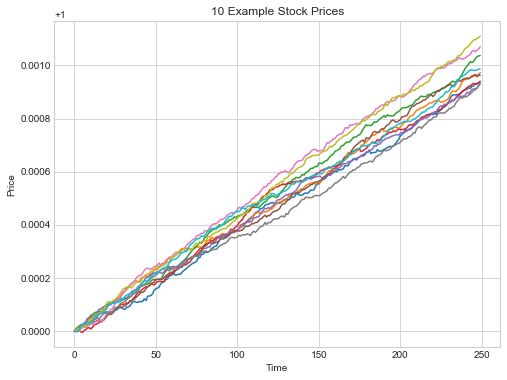

In [6]:
fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(paths)
ax.set_title('10 Example Stock Prices')
ax.set_xlabel('Time')
ax.set_ylabel('Price');

## Part (c)

The discounted stock price $X_t$ is a martingale with respect to the risk-neutral measure, and $\tilde{W_t}$ is a standard Wiener process with respect to the risk-neutral measure, so

$$ dX_t = \sigma X_t d\tilde{W_t} $$

Furthermore, we can express $S_t$ in terms of $X_t$:

$$ S_t = X_t (1+r)^t $$

In [7]:
M = 1000

In [8]:
S_N2_hat = np.zeros([10])

for idx, path in enumerate(paths.T):
    S_N2 = path[N // 2]

    # Initial condition
    X_N2 = S_N2 / (1+r)**(N//2)

    # sigma dW_tilde
    X = np.hstack([X_N2 * np.ones(shape=[M, 1]),
                  sigma*np.random.normal(loc=0, scale=delta,
                                         size=[M, N//2 - 1])]).T

    # This accumulates to make the Brownian motion
    for i, row in enumerate(X[:-1]):
        X[i + 1] *= row
        X[i + 1] += row
        
    S_N2_hat[idx] = np.mean(X[-1] * (1+r)**(N//2))

Actually, this becomes a fairly trivial issue, because $dX = 0dt + \sigma X_t d\tilde{W_t}$ and it is clearly obvious, therefore, than $X^{(i)}[N] = X^{(i)}[N/2] + Y$ where $Y$ is a random variable that is independent of $\mathcal{F}_{N/2}$ and (under the risk-neutral measure) has mean value $0$, so obviously $\tilde{E}(X_N | \mathcal{F}_{N/2}) = X_{N/2}$.

## Part (d)

This is an estimate of the conditional variance.

In [9]:
np.mean((S_N2_hat - S_N2)**2)

2.216343412988674e-09